In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [2]:
df1 = pd.read_csv('Churn.csv')
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df1.drop(['RowNumber','CustomerId','Surname','Geography'] , axis = 1)
df.rename(columns={"Exited": "Allowance"}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Allowance
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
g_mapping = {'Female' : 0 , 'Male' : 1}
df['Gender'] = df['Gender'].map(g_mapping)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Allowance        10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


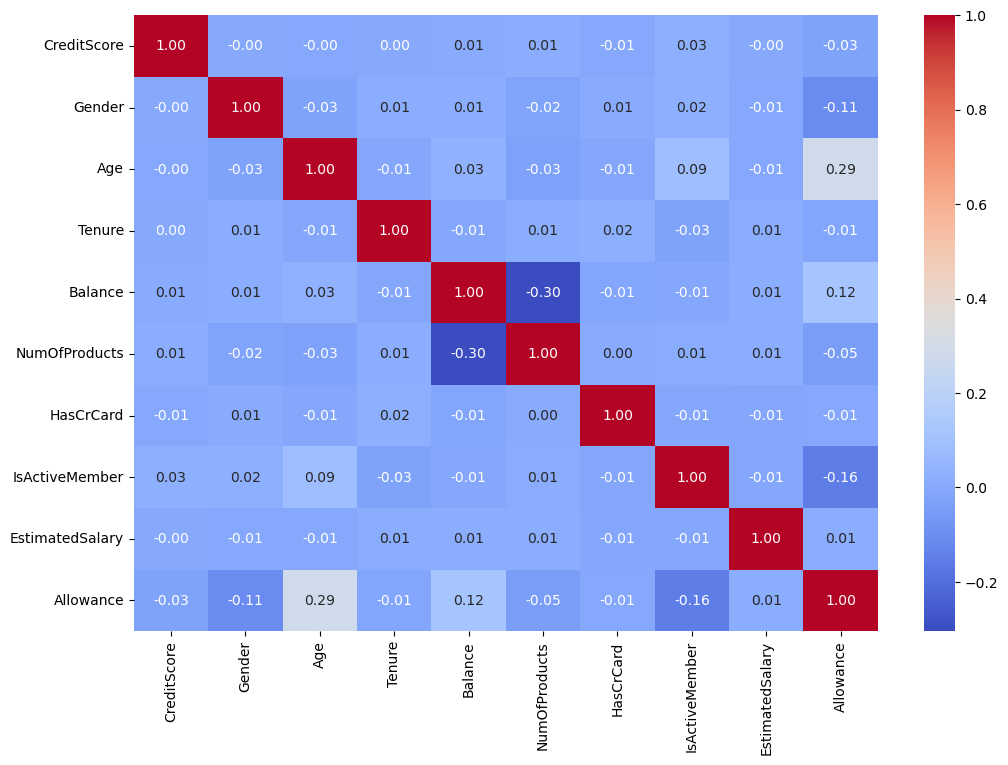

In [29]:
plt.figure(figsize=(12, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [6]:
x = df.drop('Allowance' , axis = 1)
y = df['Allowance']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense  

In [31]:
from tensorflow import keras

credit_card = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  
])

C:\Users\Admin\Documents\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
credit_card.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

credit_card.fit(x_train, y_train, epochs=50, batch_size=34)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7907 - loss: 0.5078
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8400 - loss: 0.3839
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8586 - loss: 0.3496
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8522 - loss: 0.3514
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8602 - loss: 0.3412
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8579 - loss: 0.3442
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8577 - loss: 0.3299
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8720 - loss: 0.3272
Epoch 9/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8622 - loss: 0.3308
Epoch 10/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8621 - loss: 0.3265
Epoch 11/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8643 - loss: 0.3324
Epoch 12/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/ste

In [34]:
loss, accuracy = credit_card.evaluate(x_test, y_test)
print("Loss :" , loss)
print("Accuracy :" , accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8476 - loss: 0.3826
Loss : 0.3816140294075012
Accuracy : 0.847000002861023


In [ ]:
#import pickle

#with open('credit_card.pkl', 'rb') as file:
    #credit_card_data = pickle.load(file)